In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [3]:
path = "/content/drive/MyDrive/Dataset/kidney_disease.csv"
df=pd.read_csv(path)
print(df)
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
# Delete 'id' columns 
df.drop('id', axis = 1, inplace = True)

In [6]:
# Remnaming the columns
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps','bacteria',
              'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin','packed_cell_volume', 'white_blood_cell_count', 
              'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class']

In [7]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [9]:
df[[col for col in df.columns if df[col].dtype == 'object']]

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,NaN,normal,notpresent,notpresent,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47,6700,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54,7800,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49,6600,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
columns_to_convert = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [11]:
df[[col for col in df.columns if df[col].dtype == 'object']]

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [12]:
# separating object & numeric columns
cat_cols = [col for col in df.columns if df[col].dtype =='object']
num_cols = [col for col in df.columns if df[col].dtype!='object']

In [13]:
cat_cols, num_cols

(['red_blood_cells',
  'pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'hypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'pedal_edema',
  'anemia',
  'class'],
 ['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'hemoglobin',
  'packed_cell_volume',
  'white_blood_cell_count',
  'red_blood_cell_count'])

In [14]:
# calculate unique values of categorical col
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

coronary_artery_disease has ['no' 'yes' '\tno' nan] values 

appetite has ['good' 'poor' nan] values 

pedal_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

class has ['ckd' 'ckd\t' 'notckd'] values 



In [15]:
df['diabetes_mellitus'].replace(to_replace = {'\tno': 'no', '\tyes': 'yes',' yes': 'yes'}, inplace = True)
df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no',inplace = True)
df['class'].replace(to_replace = {'ckd\t': 0, 'ckd':0,'notckd':1},inplace = True)

In [16]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

red_blood_cells has [nan 'normal' 'abnormal'] values 

pus_cell has ['normal' 'abnormal' nan] values 

pus_cell_clumps has ['notpresent' 'present' nan] values 

bacteria has ['notpresent' 'present' nan] values 

hypertension has ['yes' 'no' nan] values 

diabetes_mellitus has ['yes' 'no' nan] values 

coronary_artery_disease has ['no' 'yes' nan] values 

appetite has ['good' 'poor' nan] values 

pedal_edema has ['no' 'yes' nan] values 

anemia has ['no' 'yes' nan] values 

class has [0 1] values 



In [17]:
df['class'].dtypes

dtype('int64')

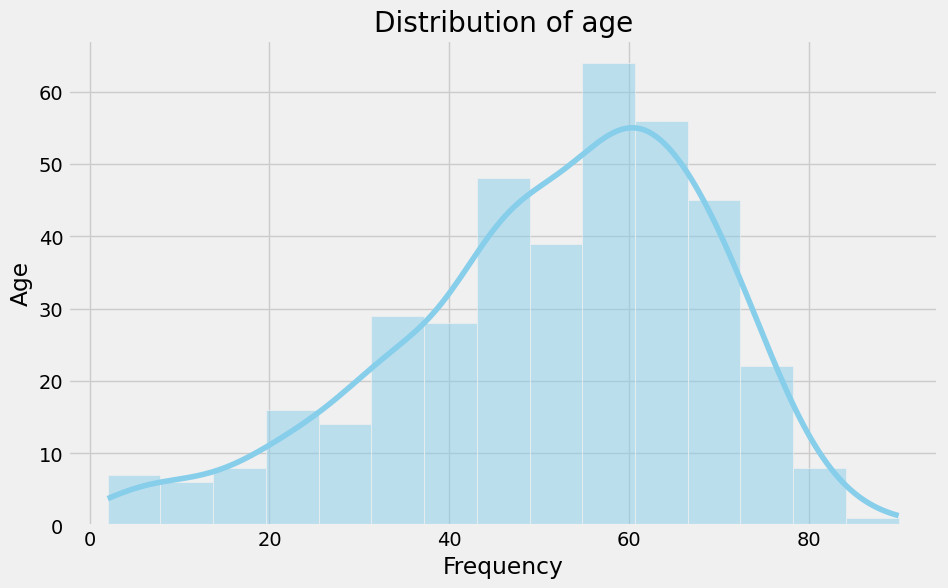

In [18]:
# univariate analysis

plt.figure(figsize = (10,6))
sns.histplot(df['age'].dropna(),kde = True,color = 'skyblue')
plt.title('Distribution of age')
plt.ylabel('Age')
plt.xlabel('Frequency')
plt.show()

In [19]:
# insights

# 1. The mea age is around 50
# 2. Most of the people are arounfd 40-60
# 3. 70-80 age of people are low in number
# 4. Most of the people are 

In [20]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [21]:
# How many people having cronic disease has hypertension


In [22]:
df['hypertension'].unique()

array(['yes', 'no', nan], dtype=object)

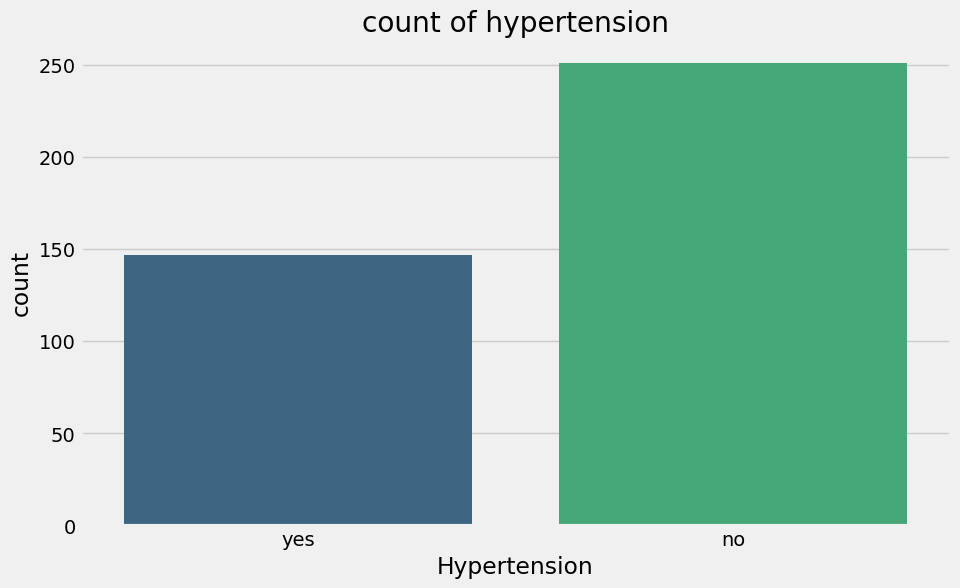

In [23]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'hypertension', data =df, palette = 'viridis')
plt.title('count of hypertension')
plt.xlabel('Hypertension')
plt.ylabel('count')
plt.show()

## 150 have hypertension

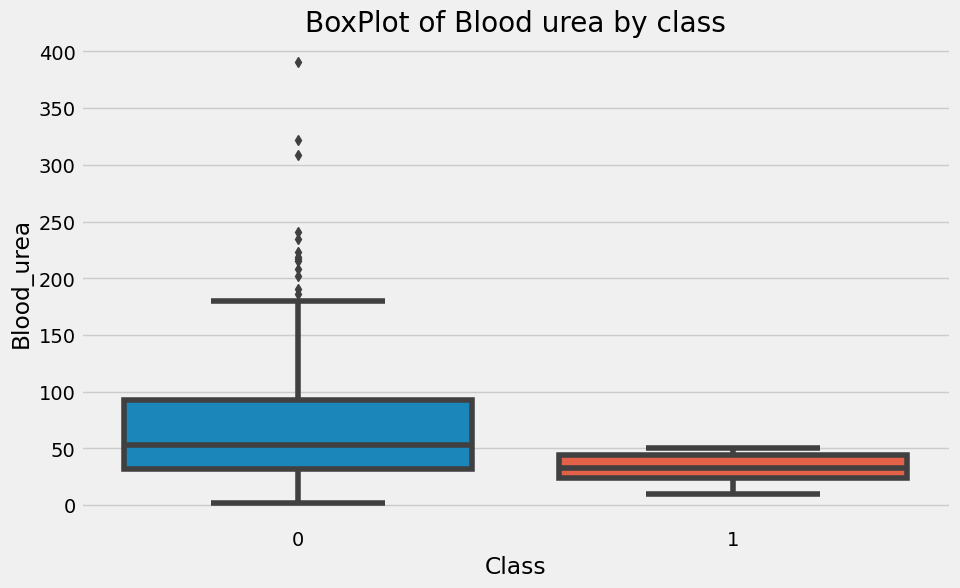

In [24]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'class', y = 'blood_urea', data = df)
plt.xlabel('Class')
plt.ylabel('Blood_urea')
plt.title('BoxPlot of Blood urea by class')
plt.show()

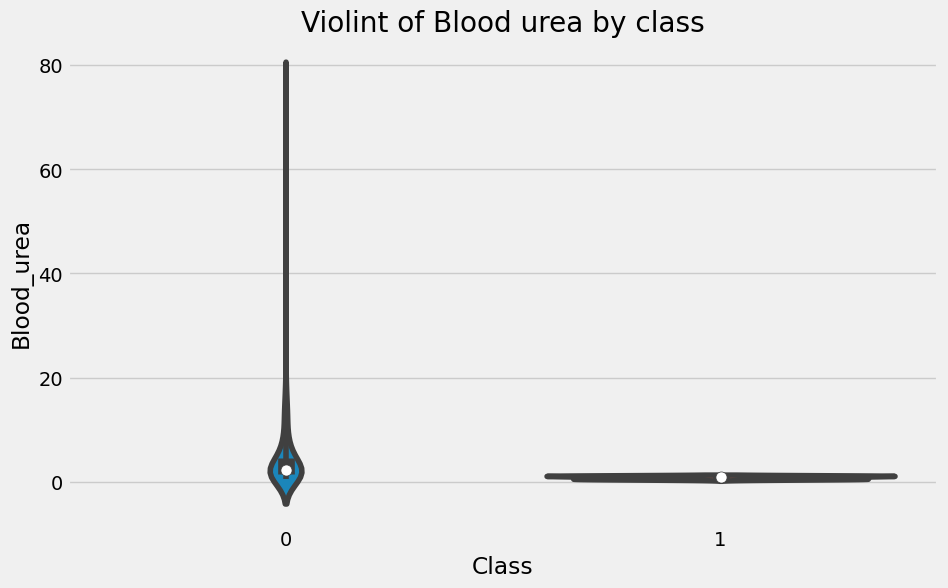

In [25]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'class', y = 'serum_creatinine', data = df)
plt.xlabel('Class')
plt.ylabel('Blood_urea')
plt.title('Violint of Blood urea by class')
plt.show()

<Axes: xlabel='anemia', ylabel='count'>

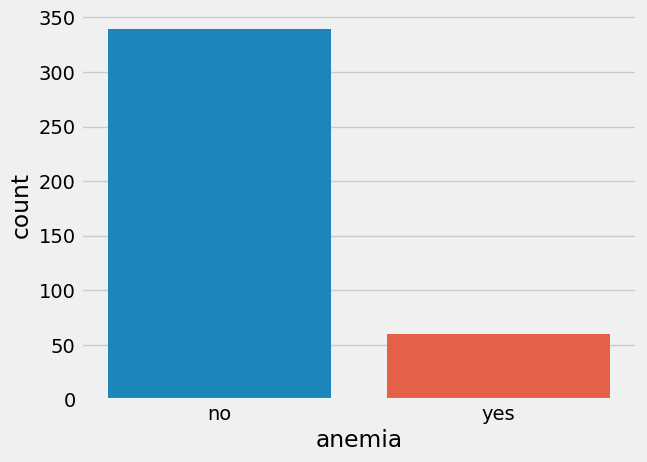

In [26]:
sns.countplot(x = 'anemia', data = df)

<Axes: ylabel='count'>

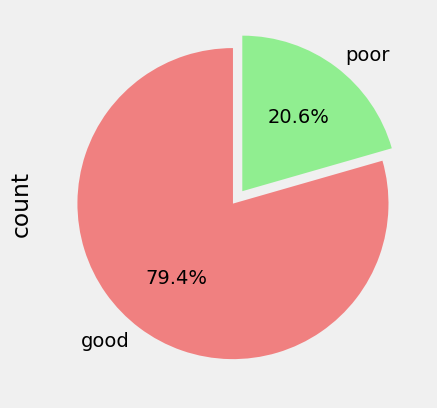

In [27]:
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90)

## 79.4% has good apetite

<Axes: ylabel='count'>

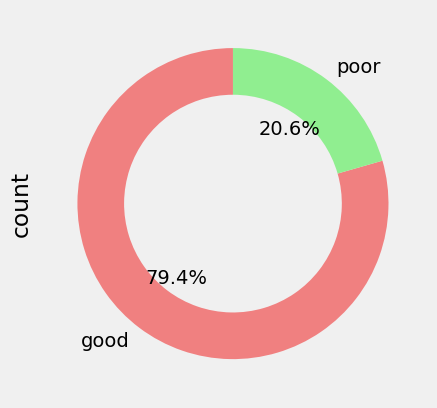

In [28]:
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], wedgeprops=dict(width =0.3), startangle=90)

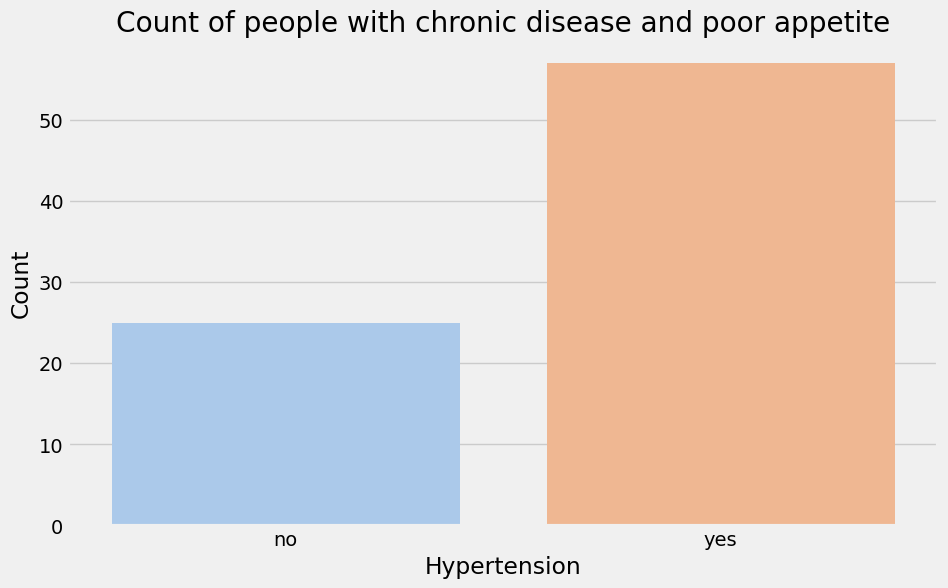

In [29]:
# Filter DataFrame for people with chronic disease and poor appetite
chronic_poor_appetite_df = df[(df['class'] == 0) & (df['appetite'] == 'poor')]

# Count plot for people with chronic disease and poor appetite
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', data=chronic_poor_appetite_df, palette='pastel')
plt.title('Count of people with chronic disease and poor appetite')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

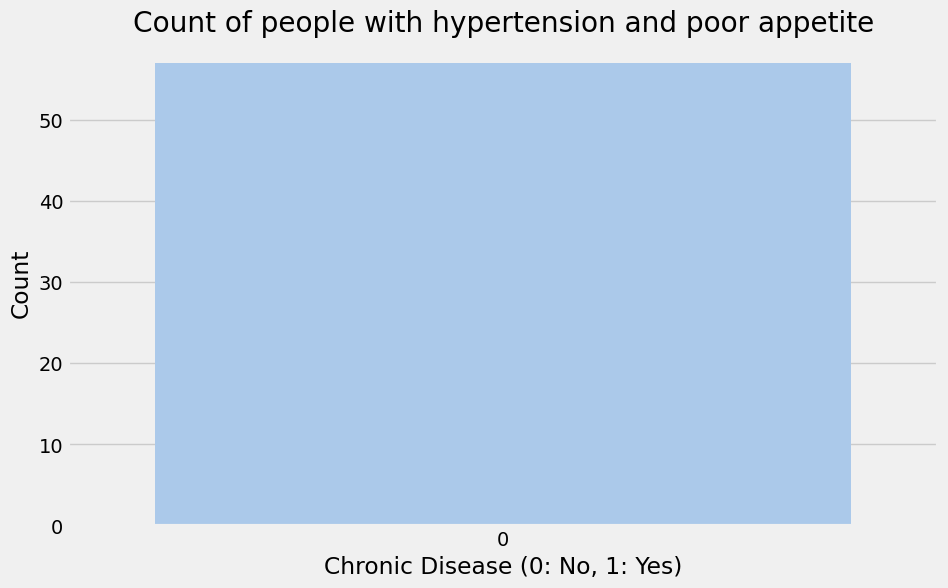

In [30]:
# Filter DataFrame for people with hypertension and poor appetite
hypertension_poor_appetite_df = df[(df['hypertension'] == 'yes') & (df['appetite'] == 'poor')]

# Count plot for people with hypertension and poor appetite
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=hypertension_poor_appetite_df, palette='pastel')
plt.title('Count of people with hypertension and poor appetite')
plt.xlabel('Chronic Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='pedal_edema', ylabel='count'>

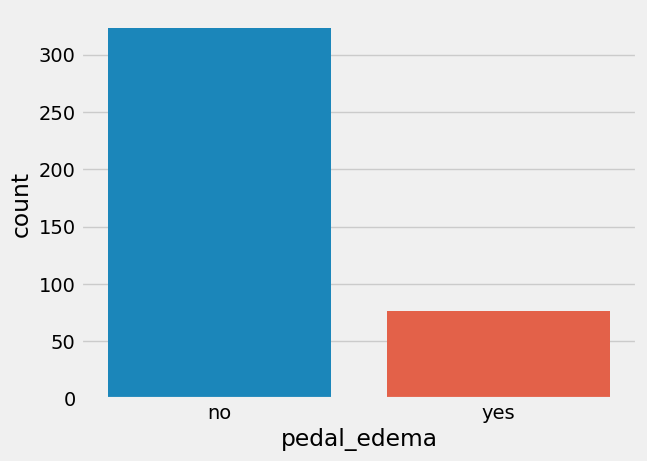

In [31]:
sns.countplot(x = 'pedal_edema', data=df)

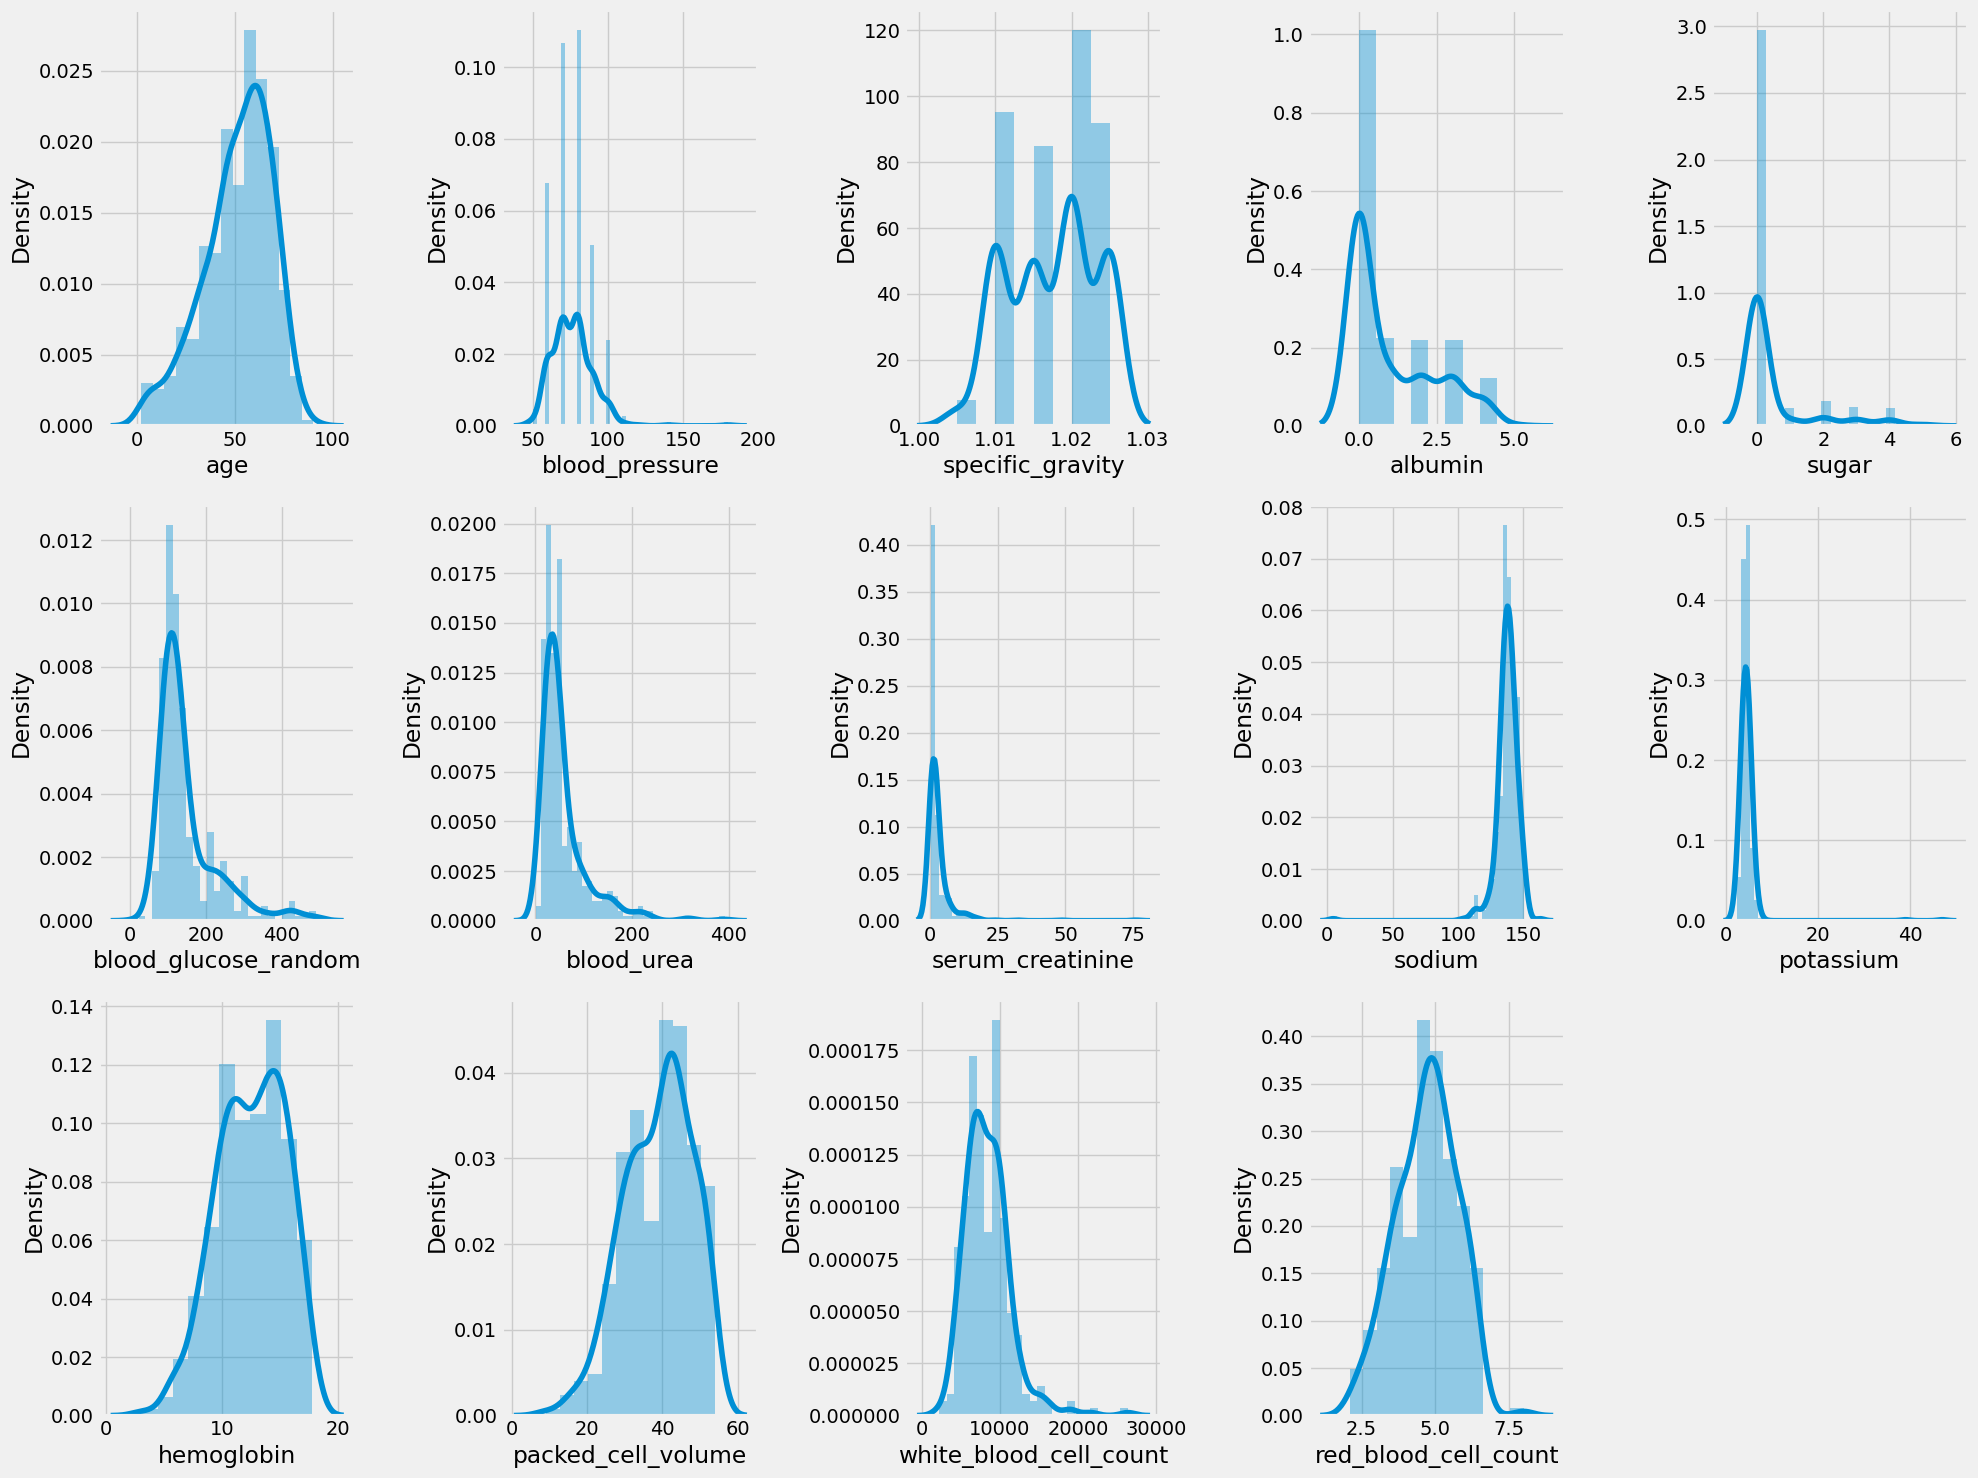

In [32]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for col in num_cols:
    if plotnumber <= 15:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
        plotnumber += 1  

plt.tight_layout()
plt.show()


In [33]:
def kde(col):
    grid = sns.FacetGrid(df, hue = "class", height =6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

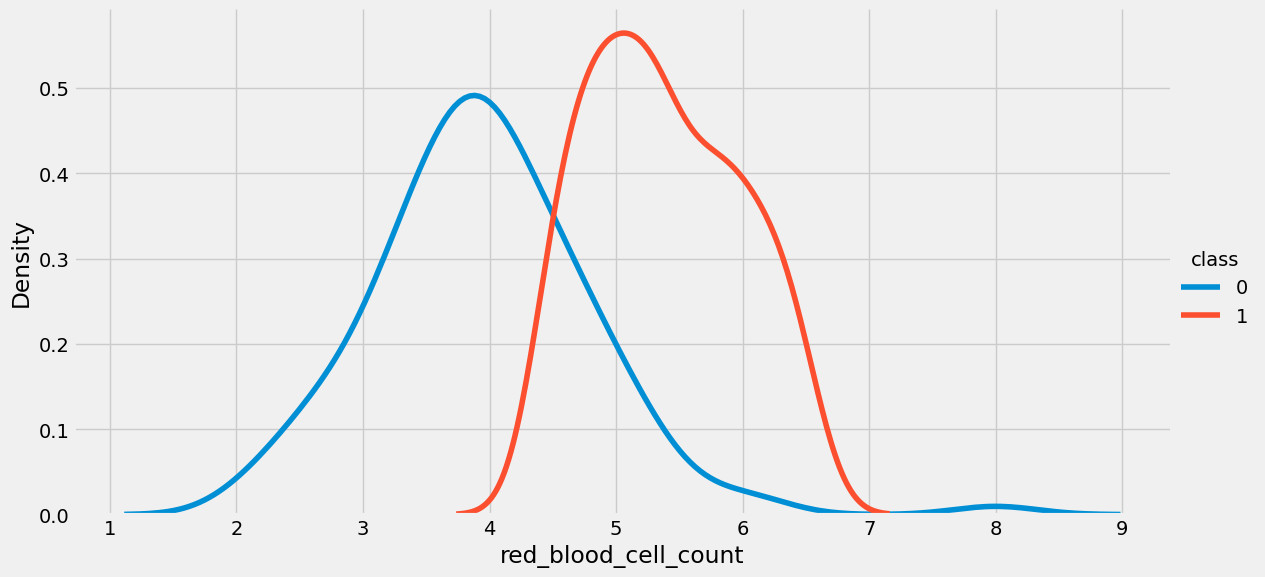

In [34]:
kde('red_blood_cell_count')

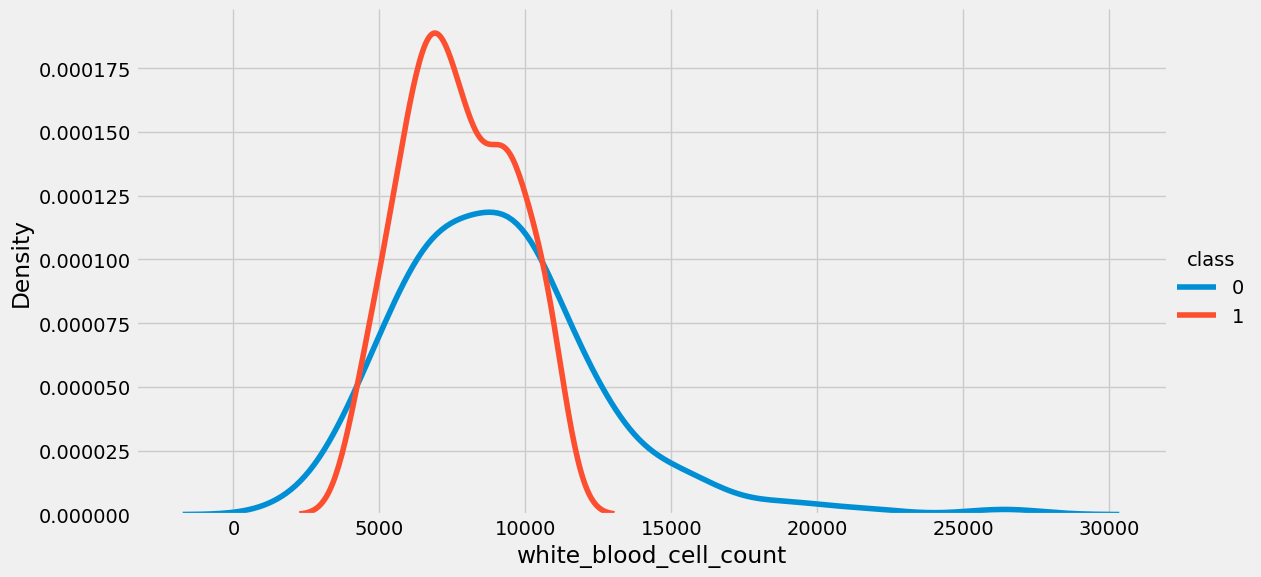

In [35]:
kde('white_blood_cell_count')

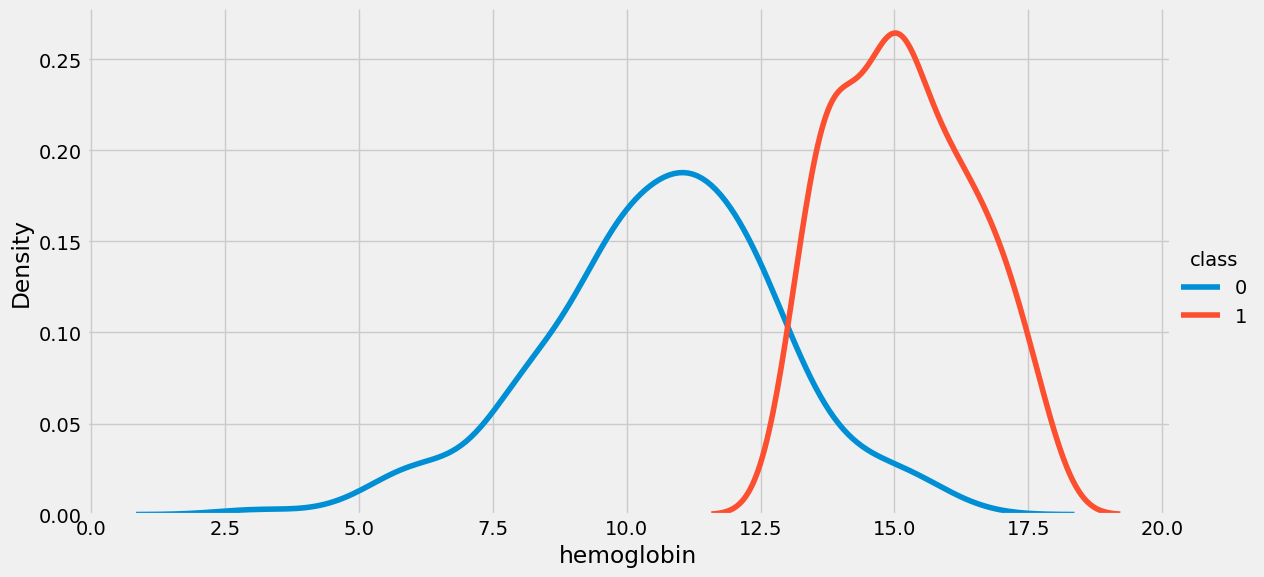

In [36]:
kde('hemoglobin')

In [37]:
def violin(col):
    fig = px.violin(df, y=col, x='class', box =True, template = 'plotly_dark')
    return fig.show()

In [38]:
violin('hemoglobin')